<a href="https://colab.research.google.com/github/meghavarshini/useful_random_code/blob/main/Generate_Spectrogram_Waveform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install librosa matplotlib numpy

In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import pathlib
from pathlib import Path

In [17]:
def find_cmap_color(cmap_color):
    '''
    Function to find a nice contrast color from the user-specified cmap
    '''
    cmap = plt.get_cmap(cmap_color)
    color = cmap(0.6)
    # Getting the lightest color, corresponds to the maximum value
    color_hex = mcolors.rgb2hex(color[:3])
    print(f"Contrast in {cmap_color} colormap: {color_hex}")
    return color_hex


def plot_waveform_and_spectrogram(audio_path, transcript,
                                  cmap_color = 'YlOrBr'):
    '''
    Function to plot the waveform and spectrogram of an audio file,
    with given transcript, and save it to file.
    '''
    # select waveform color
    waveform_color = find_cmap_color(cmap_color)

    # find filename for plot using sound file name
    file_name = Path(audio_path).stem + '_plot.png'
    save_plot_loc = str(pathlib.Path(audio_path).parents[0])+'/'+ file_name

    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)
    # y: audio time series, sr: sample rate

    # Create a time axis for the waveform
    time = np.linspace(0, len(y) / sr, num=len(y))

    # Generate a spectrogram
    hop_length = 512  # Number of samples between frames
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000, hop_length=hop_length)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Calculate the spectrogram's time axis to match the waveform
    spectrogram_time = np.arange(S.shape[1]) * hop_length / sr

    # Set up the grid layout
    fig = plt.figure(figsize=(12, 8))
    gs = GridSpec(3, 2, width_ratios=[0.05, 0.95], height_ratios=[1, 1, 0.17], figure=fig)

    # Plot waveform
    ax_waveform = fig.add_subplot(gs[0, 1])
    ax_waveform.plot(time, y, color=waveform_color)  # Lighter yellow color
    ax_waveform.set_facecolor('black')  # Dark background for waveform
    # ax_waveform.set_title('Waveform', color='black')
    # ax_waveform.set_ylabel('Amplitude', color='black')
    ax_waveform.tick_params(colors='black')  # Ticks in white for visibility on dark background
    # Add time (s) label to the top of the waveform
    ax_waveform.set_xlabel('Time (s)', color='black', labelpad=20)  # Label at the top
    ax_waveform.xaxis.set_label_position('top')  # Move label to the top

    # Plot spectrogram
    ax_spectrogram = fig.add_subplot(gs[1, 1], sharex=ax_waveform)
    ax_spectrogram.set_facecolor('white')  # White background for spectrogram
    img = ax_spectrogram.imshow(
        S_dB, aspect='auto', origin='lower',
        extent=[spectrogram_time[0], spectrogram_time[-1], 0, 8000],
        cmap=cmap_color  # Colormap for spectrogram
    )
    ax_spectrogram.set_ylabel('Frequency (Hz)', color='black')  # Dark labels for spectrogram
    # ax_spectrogram.set_xlabel('Time (s)', color='black')  # Dark x-label
    ax_spectrogram.tick_params(colors='black')  # Dark ticks for visibility on white background

    # Add a color bar on the left
    cbar_ax = fig.add_subplot(gs[:, 0])
    fig.colorbar(img, cax=cbar_ax, format='%+2.0f dB', label='dB')
    cbar_ax.tick_params(colors='black')  # Dark color bar ticks
    cbar_ax.yaxis.set_label_position('left')
    cbar_ax.yaxis.tick_left()
    cbar_ax.yaxis.set_ticks_position('left')

    # # Add a main plot title
    # fig.suptitle('Audio Waveform and Mel Spectrogram', fontsize=16, color='black')

    # Add the transcript below the spectrogram
    ax_transcript = fig.add_subplot(gs[2, 1])
    ax_transcript.axis('off')  # Turn off the axis for the transcript
    ax_transcript.text(0, 0.5, transcript, fontsize=10, color='black', ha='left', va='center', wrap=True)

    # Save the plot as PNG
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.15)  # Adjust the layout to make space for the title and transcript
    plt.savefig(save_plot_loc, format='png')

    # Show the plot
    plt.show()

In [21]:
# files
audio_file_path = '/content/multicat_snippet1.mp3'
transcript_text = "\"Green, management meeting. Management Meeting is C2. So B5, K2. How many numbers? You said above 2. Green, 2 or more. I also have one attendee in cancelled room, but i don\'t know if we\'ll have enough time.\""

/content/


Contrast in YlOrBr colormap: #f07818


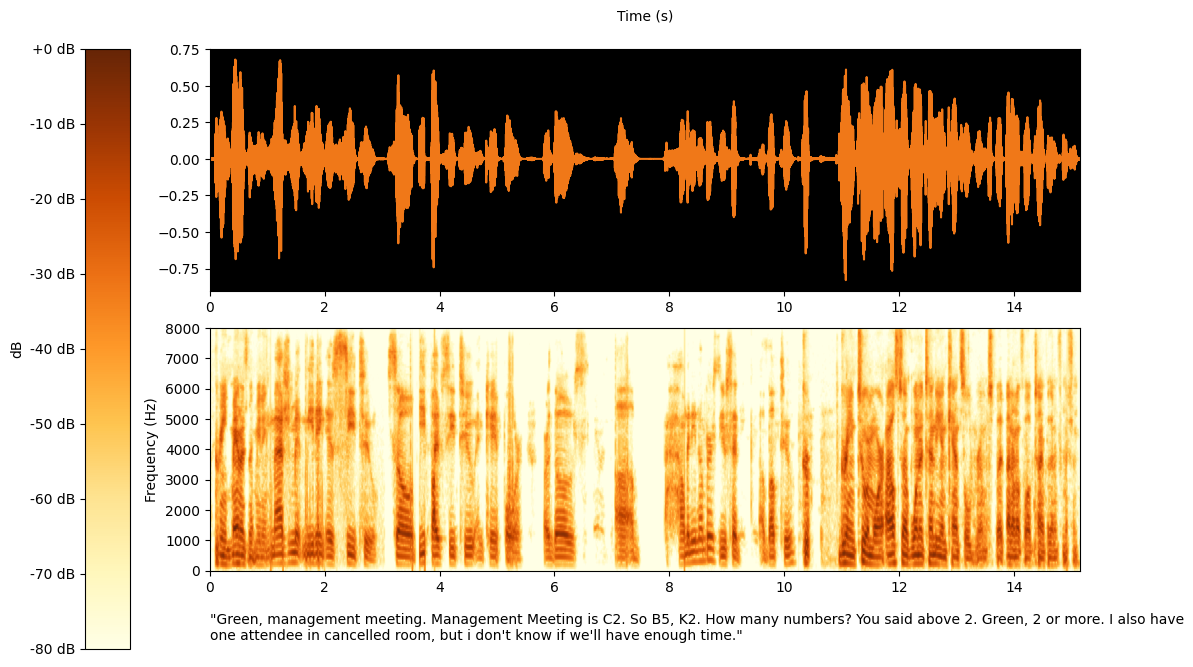

In [22]:
plot_waveform_and_spectrogram(audio_file_path, transcript_text)

In [23]:
# Replace with the path to your .mp3 file
audio_file_path = '/content/multicat_snippet2.mp3'
transcript_text = "\"Blue, I am marking an SOS for the critical victims for you to take in the E section. I am  marking an SOS, there is also one critical victim. green, copy head to southwest corner, there are a lot of critical victims in the south west corner.\""

Contrast in plasma colormap: #e16462


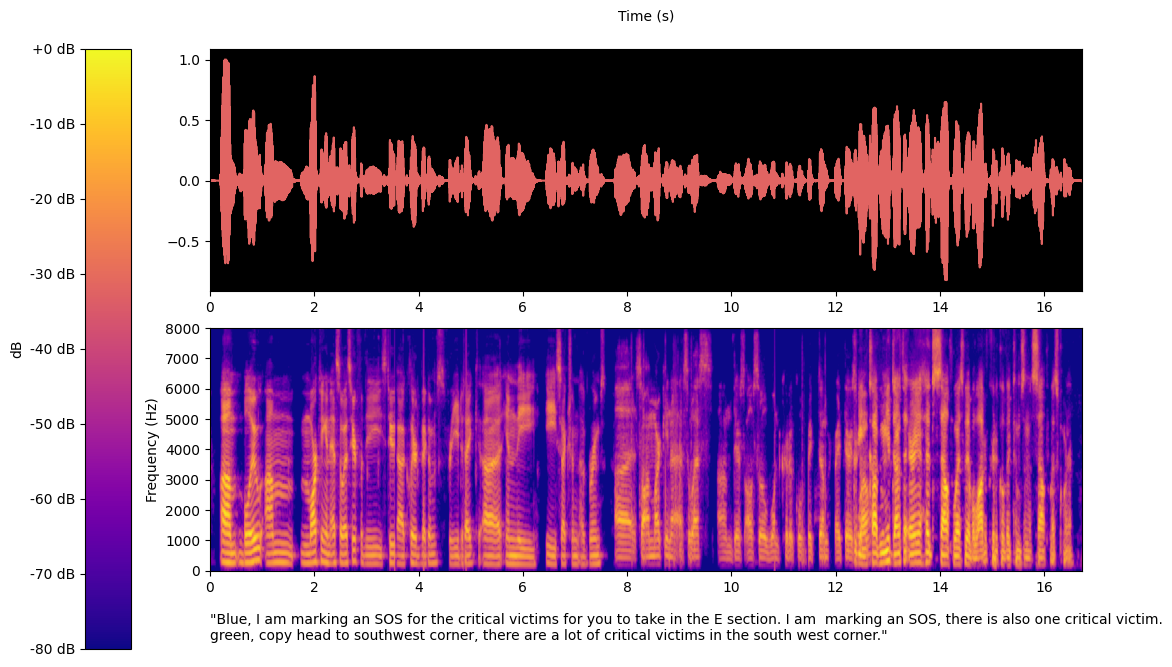

In [24]:
plot_waveform_and_spectrogram(audio_file_path, transcript_text,
                              cmap_color='plasma')

In [12]:
# Replace with the path to your .mp3 file
audio_file_path = '/content/multicat_snippet3.mp3'
transcript_text = "\"transporter if you could as you go around the room, if you see any critical victims if you could put them in the corridor north side\n if you\'re already over there\nthis is medic if transporter would come to A8 to pick up an A victim\nthis is transporter I'm going to finish up all the doors and come to you.\""

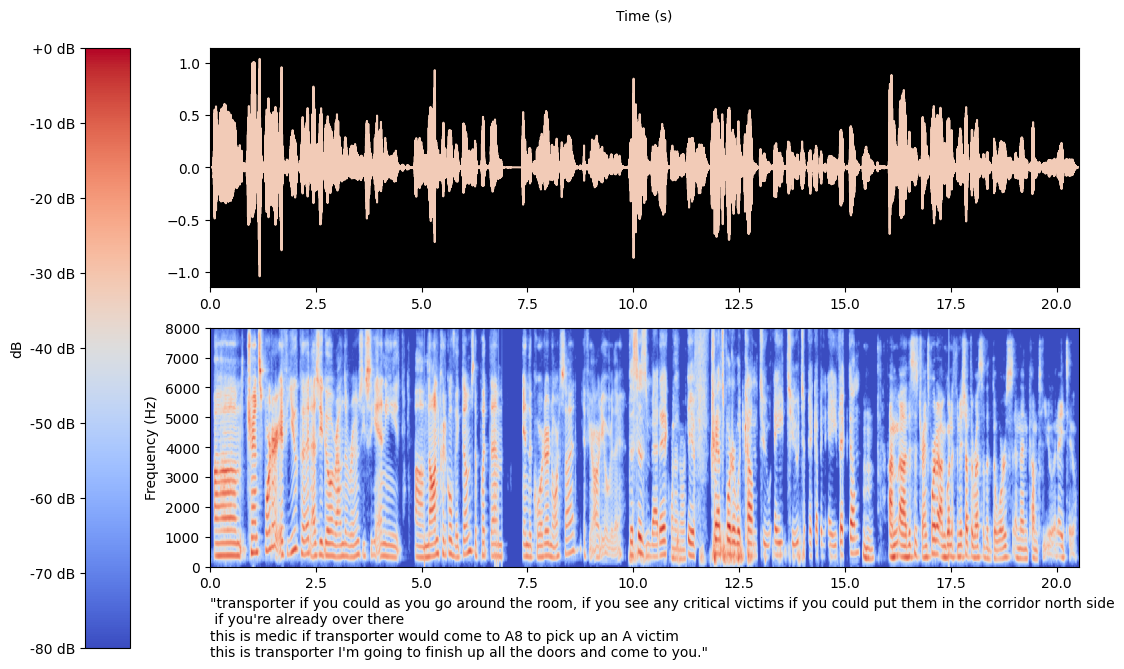

In [15]:
plot_waveform_and_spectrogram(audio_file_path, transcript_text,
                              cmap_color='coolwarm')

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Get the lightest color in 'plasma' colormap
cmap = plt.get_cmap('coolwarm')
light_color = cmap(0.6)  # Getting the lightest color, corresponds to the maximum value
light_color_hex = mcolors.rgb2hex(light_color[:3])
print(f"Lightest color in 'plasma' colormap: {light_color_hex}")

Lightest color in 'plasma' colormap: #f2cbb7
